In [1]:
# load the tools
import toto
import xarray as xr
from toto.inputs.nc import NCfile
from toto.filters import despike_phasespace3d,lanczos_filter,bandpass_filter
import matplotlib.pyplot as plt

fig import only supported on Windows


/usr/local/lib/python3.8/dist-packages/wafo-0.4.0-py3.8-linux-x86_64.egg/wafo/kdetools/demo.py:14: UserWarning: fig import only supported on Windows
  warnings.warn('fig import only supported on Windows')


In [2]:
# Read a timeseries of elevation
filename=r'../_tests/nc_file/elevation.nc'
nc=xr.open_dataset(filename)
df=nc.to_dataframe()

In [3]:
## Apply a despike_phasespace3d
df['phasespace3d']=despike_phasespace3d.despike_phasespace3d(df['elev40'].copy())

In [4]:
## Interpolate the gap
df['phasespace3d']=df['phasespace3d'].interpolate()

In [5]:
## Apply a lanczos_filter
df['lanczos_filter']=lanczos_filter.lanczos_filter(df['phasespace3d'].copy(),args={'window':30,'Type':'lanczos lowpas 1st order'})

In [6]:
## Apply a bandpass filter
df['bandpass']=bandpass_filter.bandpass_filter(df['phasespace3d'].copy(),args={'lower cut-off (s)':3600*30,'upper cut-off (s)':24*3600*30})

Warning in dyadlength: n != 2^J


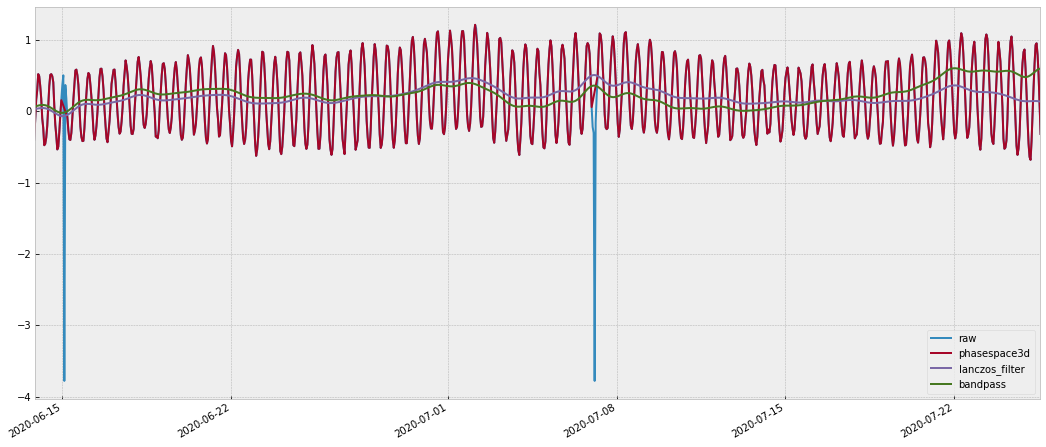

In [8]:
# Plot the results
%matplotlib inline
plt.rcParams["figure.figsize"] = [18, 8]
fig, ax = plt.subplots(1)
ax.plot(df.index,df['elev40'],label='raw')
ax.plot(df.index,df['phasespace3d'],label='phasespace3d')
ax.plot(df.index,df['lanczos_filter'],label='lanczos_filter')
ax.plot(df.index,df['bandpass'],label='bandpass')
ax.legend()
ax.set_xlim(df.index[1000],df.index[2000])
fig.autofmt_xdate()
plt.show()
